In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot,plot1d,plot2d,Interval
import re
from coffea import hist

In [4]:
try1 = load('hists_QCD_QCD_Pt_sample.coffea')
try1

{'pt': <Hist (dataset,flav,pt) instance at 0x7f889c134e10>,
 'eta': <Hist (dataset,flav,eta) instance at 0x7f8875fd1b10>,
 'phi': <Hist (dataset,flav,phi) instance at 0x7f8875fd4bd0>,
 'mass': <Hist (dataset,flav,mass) instance at 0x7f8875fd9d10>,
 'btagCMVA': <Hist (dataset,flav,btagCMVA) instance at 0x7f88dc594710>,
 'btagCSVV2': <Hist (dataset,flav,btagCSVV2) instance at 0x7f8875fe0b90>,
 'btagDeepB': <Hist (dataset,flav,btagDeepB) instance at 0x7f8875fe5c90>,
 'btagDeepC': <Hist (dataset,flav,btagDeepC) instance at 0x7f8875fe9d90>,
 'btagDeepFlavB': <Hist (dataset,flav,btagDeepFlavB) instance at 0x7f8875fede90>,
 'btagDeepFlavC': <Hist (dataset,flav,btagDeepFlavC) instance at 0x7f8875ff1f90>,
 'njet': <Hist (dataset,njet) instance at 0x7f8875ff90d0>,
 'nbjet_t': <Hist (dataset,nbjet_t) instance at 0x7f8875ff9ed0>,
 'nbjet_m': <Hist (dataset,nbjet_m) instance at 0x7f8875ffcd10>,
 'nbjet_l': <Hist (dataset,nbjet_l) instance at 0x7f8876000b50>,
 'nel': <Hist (dataset,nel) instance at 

<AxesSubplot:xlabel='jet $p_{T}$ without any cut [GeV]', ylabel='Counts'>

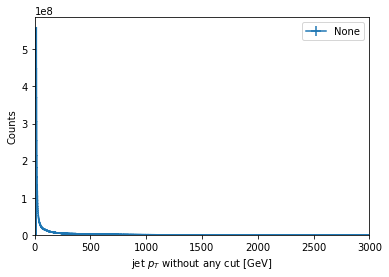

In [31]:
plot1d(try1['jet_pt_nocut'].sum('flav').sum('dataset'))

In [10]:
x_sec = [1246000000.0,106900000.0,15700000.0,2346000.0,103700.0,6826,551.2,156.7,26.25,7.465,0.6487,0.08734,0.005237,0.0001352]
nevents= [19991000.0,19706000.0,9493000.0,29688373.506835938,29676000.0,57910008.93261719,52448170.470947266,67508001.16503906,37160000.0,19730000.0,10670000.0,5491000.0,2988000.0,1000000.0]

scales=[]
for i in range(14):
    scales.append(x_sec[i]/nevents[i])
scales

[62.32804762142964,
 5.424743732873236,
 1.6538502054145159,
 0.0790208328340998,
 0.003494406254212158,
 0.00011787254268847693,
 1.0509422827347763e-05,
 2.321206335481779e-06,
 7.064047362755652e-07,
 3.7835783071464776e-07,
 6.079662605435801e-08,
 1.590602804589328e-08,
 1.7526773761713522e-09,
 1.352e-10]

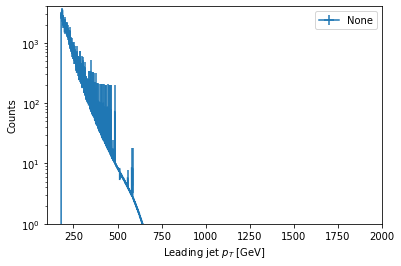

In [23]:
hist_1 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_15to30_2018_UL')
hist_1.scale(scales[0])
hist_2 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_30to50_2018_UL')
hist_2.scale(scales[1])
hist_3 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_50to80_2018_UL')
hist_3.scale(scales[2])
hist_4 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_80to120_2018_UL')
hist_4.scale(scales[3])
hist_5 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_170to300_2018_UL')
hist_5.scale(scales[4])
hist_6 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_300to470_2018_UL')
hist_6.scale(scales[5])
hist_7 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_470to600_2018_UL')
hist_7.scale(scales[6])
hist_8 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_600to800_2018_UL')
hist_8.scale(scales[7])
hist_9 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_800to1000_2018_UL')
hist_9.scale(scales[8])
hist_10 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_1000to1400_2018_UL')
hist_10.scale(scales[9])
hist_11 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_1400to1800_2018_UL')
hist_11.scale(scales[10])
hist_12 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_1800to2400_2018_UL')
hist_12.scale(scales[11])
hist_13 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_2400to3200_2018_UL')
hist_13.scale(scales[12])
hist_14 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_2400toInf_2018_UL')
hist_14.scale(scales[13])


hist_1 = (hist_1.add(hist_2))
hist_1 = (hist_1.add(hist_3))
hist_1 = (hist_1.add(hist_4))
hist_1 = (hist_1.add(hist_5))
hist_1 = (hist_1.add(hist_6))
hist_1 = (hist_1.add(hist_7))
hist_1 = (hist_1.add(hist_8))
hist_1 = (hist_1.add(hist_9))
hist_1 = (hist_1.add(hist_10))
hist_1 = (hist_1.add(hist_11))
hist_1 = (hist_1.add(hist_12))
hist_1 = (hist_1.add(hist_13))
hist_1 = (hist_1.add(hist_14))

a = plot1d(hist_1)
a.set_ylim(1, None)
a.set_xlim(100, 2000)
a.set_yscale('log')

In [5]:
def read_xs(file):
    import json
    f = open(file)
    data = json.load(f)
    xs_dict={}
    for obj in data:
        xs_dict[obj['process_name']]=float(obj['cross_section'])
    return xs_dict
read_xs('xsection-QCD.json')

{'QCD_Pt_3200toInf': 0.0001352,
 'QCD_Pt_2400to3200': 0.005237,
 'QCD_Pt_1800to2400': 0.08734,
 'QCD_Pt_1400to1800': 0.6487,
 'QCD_Pt_1000to1400': 7.465,
 'QCD_Pt_800to1000': 26.25,
 'QCD_Pt_600to800': 156.7,
 'QCD_Pt_470to600': 551.2,
 'QCD_Pt_300to470': 6826.0,
 'QCD_Pt_170to300': 103700.0,
 'QCD_Pt_80to120': 2346000.0,
 'QCD_Pt_50to80': 15700000.0,
 'QCD_Pt_30to50': 106900000.0,
 'QCD_Pt_15to30': 1246000000.0}

In [6]:
events = try1['sumw']
scales={}
def scale_xs(hist,events,lumi,xsfile="xsection-QCD.json"):
    xs_dict = read_xs(xsfile)
    
    scales={}
    for key in events:
        if type(key) != str or key=="Data": continue
        scales[key]=xs_dict[key]*lumi/events[key]
        print(xs_dict[key])
    hist.scale(scales, axis="dataset")
    return hist

<AxesSubplot:xlabel='Leading jet $p_{T}$ [GeV]', ylabel='Genflavour'>

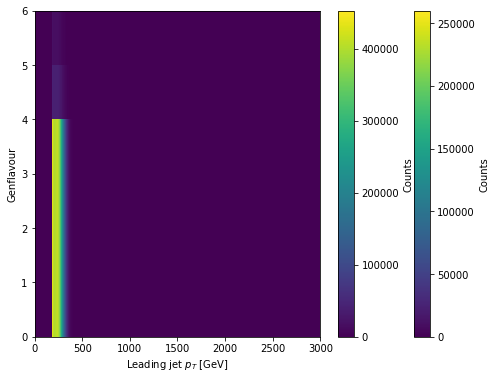

In [6]:
output_1=try1['ljpt'].integrate('dataset', 'QCD_HT300to500')
output_2=try1['ljpt'].integrate('dataset', 'QCD_HT500to700')
output_3=try1['ljpt'].integrate('dataset', 'QCD_HT00to1000')
output_4=try1['ljpt'].integrate('dataset', 'QCD_HT1000to1500')
output_5=try1['ljpt'].integrate('dataset', 'QCD_HT1500to2000')
output_6=try1['ljpt'].integrate('dataset', 'QCD_HT2000toInf')
output_7=try1['ljpt'].integrate('dataset', 'Data')
fig, ax = plt.subplots(1,1,figsize=(8,6))
output = output_1.add(output_2)
plot2d(output_7, 'ljpt', ax=ax)
plot2d(output, 'ljpt', ax=ax)

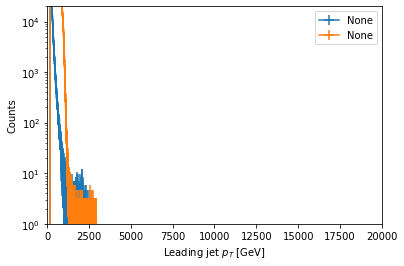

In [7]:
h1= try1['ljpt'].integrate('dataset', 'QCD_HT300to500').integrate('flav')
h2= try1['ljpt'].integrate('dataset', 'QCD_HT500to700').integrate('flav')
h3= try1['ljpt'].integrate('dataset', 'QCD_HT700to1000').integrate('flav')
h4= try1['ljpt'].integrate('dataset', 'QCD_HT1000to1500').integrate('flav')
h5= try1['ljpt'].integrate('dataset', 'QCD_HT1500to2000').integrate('flav')
h6= try1['ljpt'].integrate('dataset', 'QCD_HT2000toinf').integrate('flav')
h7= try1['ljpt'].integrate('dataset', 'Data').integrate('flav')
h1 = h1.add(h2)
h1 = h1.add(h3)
h1 = h1.add(h4)
h1 = h1.add(h5)
h1 = h1.add(h6)
#plot1d(h1)
plot1d(h7)
ax = plot1d(h1)
ax.set_ylim(1, 20000)
ax.set_xlim(0, 20000)
ax.set_yscale('log')



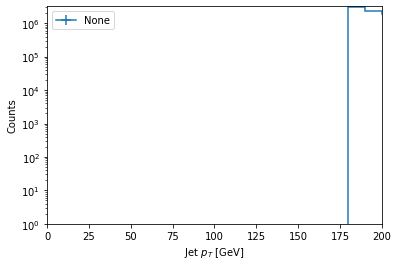

In [8]:
data = try1['pt'].integrate('dataset', 'Data').sum("flav")
qcd300= try1['pt'].integrate('dataset', 'QCD_HT300to500').sum("flav")
qcd500= try1['pt'].integrate('dataset', 'QCD_HT500to700').sum("flav")
qcd700= try1['pt'].integrate('dataset', 'QCD_HT700to1000').sum("flav")
qcd1000= try1['pt'].integrate('dataset', 'QCD_HT1000to1500').sum("flav")
qcd1500= try1['pt'].integrate('dataset', 'QCD_HT1500to2000').sum("flav")
a = plot1d(data)
a.set_ylim(1, None)
a.set_xlim(0, 200)
a.set_yscale('log')

In [9]:
hist =try1['ljpt_nocut']
#MC_hist = hist.copy() 
#hist.scale(scales[0])

In [7]:
events

defaultdict_accumulator(float,
                        {'Data': 4707.0,
                         'QCD_Pt_3200toInf_2018_UL': 1000000.0,
                         'QCD_Pt_2400to3200_2018_UL': 2988000.0,
                         'QCD_Pt_1800to2400_2018_UL': 5491000.0,
                         'QCD_Pt_1400to1800_2018_UL': 10670000.0,
                         'QCD_Pt_1000to1400_2018_UL': 19730000.0,
                         'QCD_Pt_800to1000_2018_UL': 37160000.0,
                         'QCD_Pt_600to800_2018': 67508001.16503906,
                         'QCD_Pt_470to600_2018_UL': 52448170.470947266,
                         'QCD_Pt_300to470_2018_UL': 57910008.93261719,
                         'QCD_Pt_170to300_2018_UL': 29676000.0,
                         'QCD_Pt_80to120_2018_UL': 29688373.506835938,
                         'QCD_Pt_50to80_2018_UL': 19493000.0,
                         'QCD_Pt_30to50_2018_UL': 19706000.0,
                         'QCD_Pt_15to30_2018_UL': 19991000.0})

In [11]:
for key in events:
    if type(key) != str or key=="Data": continue
    print (events[key])

5259317.485839844
10867612.754516602
15383972.248413086
48028221.12426758
55046820.885009766
52713592.58862305


In [12]:
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
# ptetas=['ljpt','sljpt','ssljpt','sssljpt','ljeta','sljeta','ssljeta','sssljeta']

In [13]:
events = try1['sumw']
# ptetas=['ljpt','sljpt','ssljpt','sssljpt','ljeta','sljeta','ssljeta','sssljeta']
ptetas=['ntracks','SV_mass','SV_dlen','SV_dlenSig','SV_deltaR','SV_pt']
datas=re.compile('(?=Data)')
notdata=re.compile('(?!Data)')

25.24
119.9
1207.0
6831.0
32100.0
347700.0
{('QCD_HT2000toInf',): 13.421393644717023, ('QCD_HT1500to2000',): 58.26729802613089, ('QCD_HT1000to1500',): 525.6284998716197, ('QCD_HT700to1000',): 2616.151580544638, ('QCD_HT500to700',): 9508.598856115526, ('QCD_HT300to500',): 18068.94393317388}
{('Data',): 3135551.0}
101.83332216123611
25.24
119.9
1207.0
6831.0
32100.0
347700.0
{('QCD_HT2000toInf',): 13.265413238094164, ('QCD_HT1500to2000',): 57.874884043747535, ('QCD_HT1000to1500',): 524.3366842937511, ('QCD_HT700to1000',): 2616.0171742549837, ('QCD_HT500to700',): 9515.492736523127, ('QCD_HT300to500',): 18080.97507673394}
{('Data',): 3137580.0}
101.84315350519492
25.24
119.9
1207.0
6831.0
32100.0
347700.0


/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


{('QCD_HT2000toInf',): 13.621017083086489, ('QCD_HT1500to2000',): 58.981483089154445, ('QCD_HT1000to1500',): 530.1371049236833, ('QCD_HT700to1000',): 2629.7879164460956, ('QCD_HT500to700',): 9535.805833301882, ('QCD_HT300to500',): 18095.671013056195}
{('Data',): 3142643.0}
101.82227045264695
25.24
119.9
1207.0
6831.0
32100.0
347700.0
{('QCD_HT2000toInf',): 11.927831580599566, ('QCD_HT1500to2000',): 52.35309812300241, ('QCD_HT1000to1500',): 477.940145124641, ('QCD_HT700to1000',): 2405.2571604537366, ('QCD_HT500to700',): 8823.018136043875, ('QCD_HT300to500',): 16924.70566676102}
{('Data',): 2915458.0}
101.60088770695323


/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)
/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom 

25.24
119.9
1207.0
6831.0
32100.0
347700.0
{('QCD_HT2000toInf',): 13.622250452248451, ('QCD_HT1500to2000',): 58.99068442915972, ('QCD_HT1000to1500',): 530.2480449314031, ('QCD_HT700to1000',): 2630.3460225631356, ('QCD_HT500to700',): 9537.5937403675, ('QCD_HT300to500',): 18098.78433529323}
{('Data',): 3143458.0}
101.83026406262037
25.24
119.9
1207.0
6831.0
32100.0
347700.0
{('QCD_HT2000toInf',): 13.622250452248451, ('QCD_HT1500to2000',): 58.99068442915973, ('QCD_HT1000to1500',): 530.2480449314031, ('QCD_HT700to1000',): 2630.3460225631356, ('QCD_HT500to700',): 9537.593740367498, ('QCD_HT300to500',): 18098.784335293225}
{('Data',): 3143458.0}
101.83026406262039


/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/uscms/home/hhsia/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


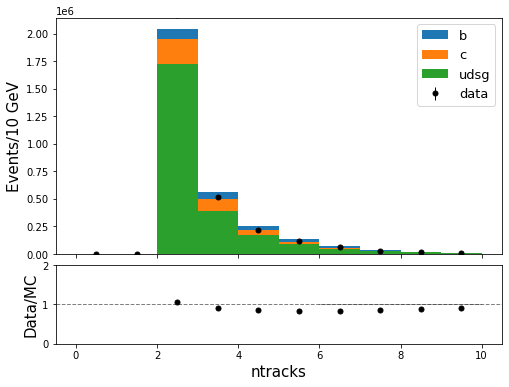

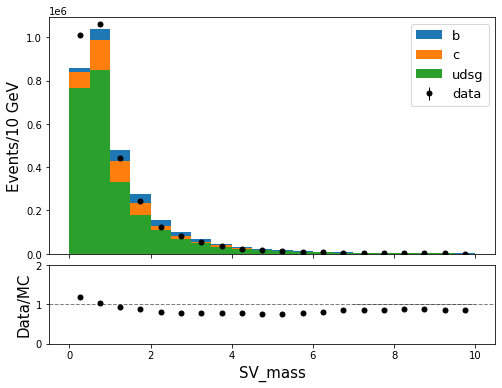

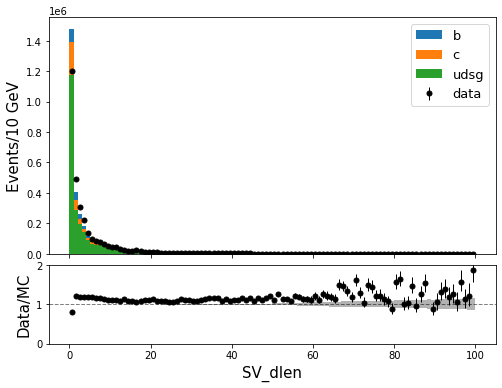

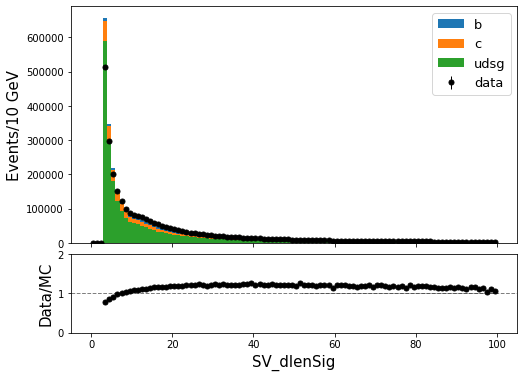

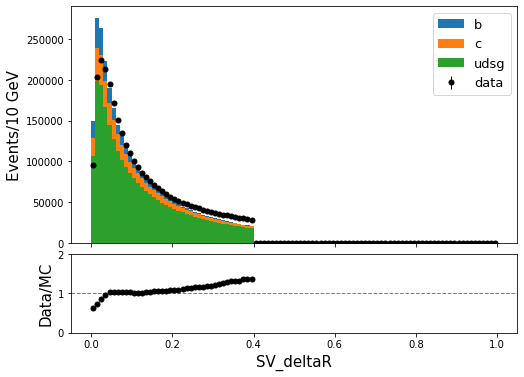

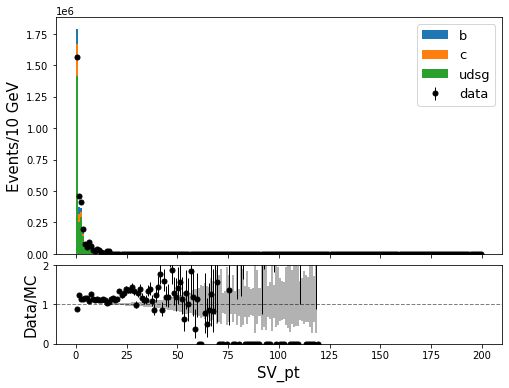

In [14]:
for name in ptetas:
    hlj=try1[name]
    hlj=scale_xs(hlj,events,1) 
    norm = {}
    sumMCall = 0
    for key in hlj[notdata].sum(name).sum("flav").values().keys():
        newkey = str(key).replace('(','').replace(',)','').replace("'","")
    
        sumMCall += hlj[notdata].sum(name).sum("flav").values()[key]
        #norm[newkey] = hlj[datas].sum(name).sum("flav").values()[('Data',)] / hlj[notdata].sum(name).sum("flav").values()[key]
    norm = hlj[datas].sum(name).sum("flav").values()[('Data',)] / sumMCall
    #norm['sumMCall'] = hlj[datas].sum(name).sum("flav").values()[('Data',)] / hlj[notdata].sum(name).sum("flav").values()[key]
    print(hlj[notdata].sum(name).sum("flav").values())
    print(hlj[datas].sum(name).sum("flav").values())
    print(norm)
    
    hlj_nodatacopy=hlj[notdata]

    #hlj_nodatacopy.scale(norm['sumMCall'])
    hlj_nodatacopy.scale(norm)
    
    fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    ax=plot.plot1d(hlj_nodatacopy.sum("dataset"),overlay="flav", ax=ax,  density=False, clear=False,stack=True)
    plot.plot1d(hlj[datas].sum("dataset").sum("flav"),error_opts=data_err_opts,ax=ax,density=False,clear=False)
    ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','udsg','data'],fontsize=13)

    rax=plot.plotratio(
                                        #num=hlj[datas].sum("dataset").sum("flav").rebin(name,10),
                                        num=hlj[datas].sum("dataset").sum("flav"),
                                        #denom=hlj_nodatacopy.sum("dataset").sum("flav").rebin(name,10),
                                        denom=hlj_nodatacopy.sum("dataset").sum("flav"),
                                        ax=rax,
                                        error_opts= data_err_opts,
#                                         denom_fill_opts={'yerr':[ratio_up,ratio_dn]},
                                        denom_fill_opts={},
                                        guide_opts={},
                                        unc='num',
                                        clear=False)
    

    ax.set_ylabel("Events/10 GeV",fontsize=15)
    #ax.set_yscale('log')
    #ax.set_ylim(1,800000000)
    #ax.set_ylim(1,1000)
    rax.set_ylabel('Data/MC',fontsize=15)
    ax.set_xlabel(None)
    rax.set_xlabel(name,fontsize=15)
    rax.set_ylim(0.0,2.)
    #rax.set_yscale('log')
    #plt.savefig(name+'.png')  
    

In [15]:
norm = {}
sumMCall = 0
for key in hlj[notdata].sum('ljeta').sum("flav").values().keys():
    newkey = str(key).replace('(','').replace(',)','').replace("'","")
    
    sumMCall += hlj[notdata].sum('ljeta').sum("flav").values()[key]
norm = hlj[datas].sum('ljeta').sum("flav").values()[('Data',)] / sumMCall
norm

KeyError: 'No axis ljeta found in <Hist (dataset,flav,SV_pt) instance at 0x7fae86300bd0>'

In [ ]:
events = try1['sumw']
# ptetas=['ljpt','sljpt','ssljpt','sssljpt','ljeta','sljeta','ssljeta','sssljeta']
datas=re.compile('(?=Data)')
notdata=re.compile('(?!Data)')
hlj=try1['ljpt']
#hlj=scale_xs(hlj,events,1)
# norm = {}
#for key in hlj[notdata].sum('ljpt').sum("flav").values().keys():
#    newkey = str(key).replace('(','').replace(',)','').replace("'","")
#    norm[newkey] = hlj[datas].sum('ljpt').sum("flav").values()[('Data',)] / hlj[notdata].sum('ljpt').sum("flav").values()[key]
hlj_nodatacopy=hlj[notdata]
#hlj_nodatacopy.scale(norm,axis="dataset")
hlj_nodatacopy.scale(norm['sumMCall'])
# hlj_nodatacopy.scale(231.7836728873188)


fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax=plot.plot1d(hlj_nodatacopy.sum("dataset"),overlay="flav", ax=ax,  density=False, clear=False,stack=True)
plot.plot1d(hlj[datas].sum("dataset").sum("flav"),error_opts=data_err_opts,ax=ax,density=False,clear=False)
ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','udsg','data'],fontsize=13)

rax=plot.plotratio(
                                        num=hlj[datas].sum("dataset").sum("flav"),
                                        denom=hlj_nodatacopy.sum("dataset").sum("flav"),
                                        ax=rax,
                                        error_opts= data_err_opts,
#                                         denom_fill_opts={'yerr':[ratio_up,ratio_dn]},
                                        denom_fill_opts={},
                                        guide_opts={},
                                        unc='num',
                                        clear=False)
    

ax.set_ylabel("Events",fontsize=15)
#ax.set_yscale('log')
#ax.set_ylim(1,10000000)
rax.set_ylabel('Data/MC',fontsize=15)
ax.set_xlabel('ljpt')
rax.set_xlabel('ljpt',fontsize=15)
rax.set_ylim(0.0,2.0)
#rax.set_yscale('log')


In [ ]:
hlj[notdata]

In [ ]:
print(hlj_nodatacopy.sum("dataset").sum('flav').sum('ljpt').values()[()])
print(hlj[datas].sum("dataset").sum("flav").sum('ljpt').values()[()])
events
11400185.0/49184.59034662972

In [ ]:
#hlj[notdata].integrate('flav', Interval(0, 4))
# coffea.hist
#plot1d(hlj[notdata].integrate('flav', Interval(0, 4)), stack=True)
plot1d(hlj[notdata].integrate('flav'))

In [ ]:
Ntt = np.sum(hlj[notdata].sum('eta').sum("flav").values())
N = np.sum(hlj[datas].sum('eta').sum("flav").values())
Ntt = [i for i in Ntt.values()] # the zeroth column entry is the number of events defined as a float
N = [i for i in N.values()]
norm=N[0]/Ntt
norm = {'QCD_HT2000toInf': 4.56059025e+10,'QCD_HT1500to2000': 4.39239261e+09, 'QCD_HT1000to1500':6.86918614e+07,'QCD_HT500to700': 8.15042151e+06,
      'QCD_HT500to700': 6.15260878e+05,'QCD_HT300to500': 3.17703133e+04}


In [ ]:
hlj[notdata].sum('eta').sum("flav").values()

In [ ]:
norm = {}
for key in hlj[notdata].sum('eta').sum("flav").values().keys():
    newkey = str(key).replace('(','').replace(',)','').replace("'","")
    norm[newkey] = hlj[datas].sum('eta').sum("flav").values()[('Data',)] / hlj[notdata].sum('eta').sum("flav").values()[key]

norm

In [ ]:


output_1 = load('hists_QCD_QCD_HT_sample_300-500.coffea')
output_2 = load('hists_QCD_QCD_HT_sample_500-700.coffea')
output_3 = load('hists_QCD_QCD_HT_sample_700-1000.coffea')
output_4 = load('hists_QCD_QCD_HT_sample_1000-1500.coffea')
output_5 = load('hists_QCD_QCD_HT_sample_1500-2000.coffea')
output_6 = load('hists_QCD_QCD_HT_sample_2000-inf.coffea')
#plot1d(output_1['ljpt'])
#plot1d(output_2['ljpt'])
#plot1d(output_3['ljpt'])
#plot1d(output_4['ljpt'])
#plot1d(output_5['ljpt'])
#plot1d(output_6['ljpt'])


In [ ]:
plot1d(output_6['eta'])

In [ ]:
x_sec = [347700,32100,6831,1207,119.9,25.24]
nevents= [52778707,55152960,48158738,15446605,10938738,5320919]

scales=[]
for i in range(6):
    scales.append(x_sec[i]/nevents[i])
scales

In [ ]:
for key in events:
    

In [ ]:
plot1d(output_6['btagCMVA'])

In [ ]:
hist =output_1['ljpt'].integrate('dataset', 'QCD_HT')
#MC_hist = hist.copy() 
hist.scale(scales[0])
hist2 =output_2['ljpt'].integrate('dataset', 'QCD_HT')
hist2.scale(scales[1])
hist3 =output_3['ljpt'].integrate('dataset', 'QCD_HT')
hist3.scale(scales[2])
hist4 =output_4['ljpt'].integrate('dataset', 'QCD_HT')
hist4.scale(scales[3])
hist5 =output_5['ljpt'].integrate('dataset', 'QCD_HT')
hist5.scale(scales[4])
hist6 =output_6['ljpt'].integrate('dataset', 'QCD_HT')
hist6.scale(scales[5])

hist = (hist.add(hist2))
hist = (hist.add(hist3))
hist = (hist.add(hist4))
hist = (hist.add(hist5))
hist = (hist.add(hist6))

a = plot1d(hist)
a.set_ylim(1, None)
a.set_xlim(175, 2000)
a.set_yscale('log')

In [ ]:
#plot1d(output_1['ljpt'])
output = (output_1['ljpt'].integrate('dataset', 'QCD_HT').add(output_2['ljpt'].integrate('dataset', 'QCD_HT')))
plot1d(output)

In [ ]:
hist =output_1['ljpt'].integrate('dataset', 'QCD_HT')
#MC_hist = hist.copy() 
hist.scale(20)
hist2 =output_2['ljpt'].integrate('dataset', 'QCD_HT')
hist2.scale(20)
output3 = (hist.add(hist2))
plot1d(output3)

In [ ]:
ax = plot1d(output_1['ljpt'])
ax.set_ylim(1, 100)
ax.set_xlim(0, 200)
ax.set_yscale('log')


In [ ]:
plot1d(output_2['ljpt'].integrate('dataset', 'QCD_HT'))
events=output_1['sumw']
events

In [ ]:
weights = output_1['ljpt'].values()[('QCD_HT',)]
weights

for i in range(len(weights)):
    print(output_1['ljpt'].axis('ljpt').centers()[i], weights[i])

In [ ]:
output_1['ljpt'].axis('ljpt').centers()#*np.where(output['ljpt'].values()[('inclusive_QCD',)]==0, 0, 1)

In [ ]:
np.repeat(output_1['ljpt'].axis('ljpt').centers(), np.array(weights, dtype=int))

In [ ]:
import json
f = open('QCD_samples.json')
sample = json.load(f)
for i in sample['Data']:
    print(i)

In [ ]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
